# Product Demand Forcasts

# Essential Purpose
## Skills tested:
Using Pandas to access and explore the dataset.
Using Pandas to cleanse columns and choose features.
Using Scikit-Learn to preprocess the data before training.
Using decision tree and linear regressors for regression modeling and testing data.
Using Scikit-Learn for regression evaluation and enhancement.
## Description:
Product demand fluctuations are exceptionally important for companies. Let's investigate one company's data and see if we can build a model to predict a product's demand!
License: The dataset is a GPL 2 dataset, and it is publicly available online.
Submission of your project on GitHub is optional. If you choose to manage your project using GitHub, find guidelines for using GitHub here. Ensure you are coding using your Jupyter Notebook – it will be uploaded to GitHub when you perform a GIT push operation.
## Expected Output
By the end of this mini project, you will need to deliver within your code:
Multiple R-squared measures resembling different criteria used for training your decision trees regression.
The R-squared measure resembling support vector regression (SVR) output.
You are expected to write around 25 lines of code to complete this project.


In [1]:
# Download and read the dataset 
import pandas as pd 
df=pd.read_csv('Historical Product Demand.csv')
print(df.shape)
df.head(5)

(1048575, 5)


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [2]:
df.dropna(inplace=True)

In [3]:
features = len(df.columns)
df.shape

(1037336, 5)

# Extract Features
Exclude the region and date from the considered features.
Hint: You can choose to use all the features.

In [4]:
#Assuming 'region' means 'Warehouse'
#df.drop(['Date', 'Warehouse'], axis=1, inplace=True)
df.drop(['Date'], axis=1, inplace=True)

In [5]:
df.head(5)

,Product_Code,Warehouse,Product_Category,Order_Demand
0,Product_0993,Whse_J,Category_028,100
1,Product_0979,Whse_J,Category_028,500
2,Product_0979,Whse_J,Category_028,500
3,Product_0979,Whse_J,Category_028,500
4,Product_0979,Whse_J,Category_028,500


# Perform Preprocessing
Perform any needed pre-processing on the chosen features including:
Scaling.
Encoding.
Dealing with Nan values.
Hint:
Use only the preprocessing steps you think are useful.

In [6]:
#encode the "Product_Code" and "Product_Category" data columns
from sklearn.preprocessing import LabelEncoder

df["Product_Code"] = LabelEncoder().fit_transform(df["Product_Code"])
df["Product_Category"]= LabelEncoder().fit_transform(df["Product_Category"])
df["Warehouse"]= LabelEncoder().fit_transform(df["Warehouse"])
df.head(5)

,Product_Code,Warehouse,Product_Category,Order_Demand
0,982,2,27,100
1,968,2,27,500
2,968,2,27,500
3,968,2,27,500
4,968,2,27,500


In [7]:
y=df.iloc[:,3:4].values
y2=pd.Series(y[:,0])
y3=pd.to_numeric(y2, errors='coerce', downcast='integer')

In [8]:
df['Order_Demand']=y3.to_frame()
df.dropna(inplace=True)
y=df.iloc[:,3:4].values
X=df.iloc[:,0:3].values

In [9]:
import matplotlib.pyplot as plt

<AxesSubplot:>

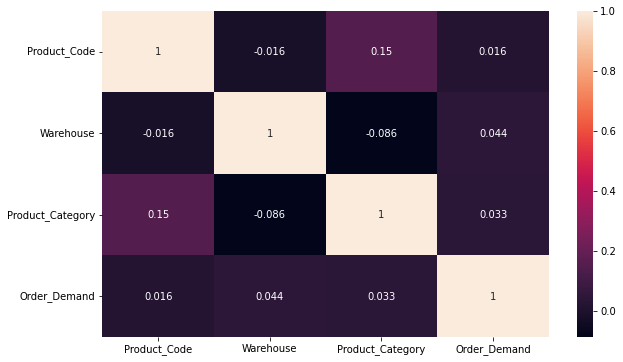

In [10]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
y_normalized = scaler.fit_transform(y)
y_normalized

array([[-0.16699593],
       [-0.15324808],
       [-0.15324808],
       ...,
       [-0.08450883],
       [-0.16871441],
       [-0.17029541]])

In [14]:
df.head(5)

,Product_Code,Warehouse,Product_Category,Order_Demand
0,982,2,27,100.0
1,968,2,27,500.0
2,968,2,27,500.0
3,968,2,27,500.0
4,968,2,27,500.0


# Split the Data
Split your data as follows:
80% training set
10% validation set
10% test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_normalized, test_size = 0.2)
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size = 0.5)

In [16]:
y_train

array([[-0.15324808],
       [-0.12575238],
       [-0.16957365],
       ...,
       [ 0.58569888],
       [-0.11028605],
       [-0.160122  ]])

In [17]:
import numpy as np
np.min(y_normalized)

-0.17043289262932246

# Training K-Nearest Neighbor (KNN) Regression
Use a KNN regressor model to train your data.
Choose the best k for the KNN algorithm by trying different values and validating performance on the validation set.
Regression Metrics
Print the R-squared score of your final KNN regressor.

In [18]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 10).fit(X_train, y_train)
score=model.score(X_test, y_test)
score

-0.12224543899026385

In [19]:
y_pred = model.predict(X_test)

In [21]:
#choose best k 
scores= []
results = 0
best_score = -0.2
neighbors=range(1,30, 3)

for i in neighbors:
    knn = KNeighborsRegressor(n_neighbors = i).fit(X_train, y_train)
    results = knn.score(X_test, y_test)
    scores.append(round(results,2))
    
    if results > best_score:
        best_score = results
        best_k = i
        best_model = knn 
        
print(scores)
print(best_k)
    

[-0.99, -0.35, -0.2, -0.12, -0.05, -0.03, -0.02, -0.02, -0.0, -0.0]
28


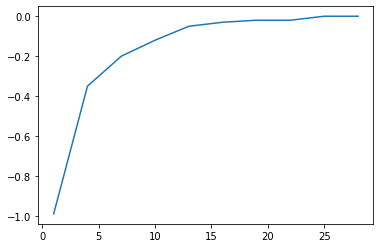

In [22]:
import matplotlib.pyplot as plt
plt.plot(neighbors, scores)

In [23]:
accuracy = best_model.score(X_validate, y_validate)
print("The best model has an accuracy of: ", round(accuracy, 2))

The best model has an accuracy of:  0.01


# Challenge Yourself (Optional)
Repeat step 6 for a different regression modelling technique.

In [24]:
# Linear Regression
from sklearn.linear_model import LinearRegression 
modelLR = LinearRegression().fit(X_train, y_train)
score = modelLR.score(X_test, y_test)
print(score)

0.003039438461796551


In [25]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
modelRFR = RandomForestRegressor(criterion = "squared_error", max_leaf_nodes = 100).fit(X_train, y_train.ravel())
score = modelRFR.score(X_test, y_test)
y_pred = modelRFR.predict(X_test)

print(score)

0.040289427340369666


In [27]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
modelDTR = DecisionTreeRegressor(criterion = "squared_error").fit(X_train, y_train.ravel())
score = modelDTR.score(X_test, y_test)
y_pred = modelDTR.predict(X_test)

print(score)

0.04394366993140497


# Submit on GitHub